# Read in Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv("train.csv")
data.head()

review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive

In [3]:
from sklearn.preprocessing import LabelEncoder

# Assuming 'sentiments' is a DataFrame column containing 'positive' and 'negative' labels
label_encoder = LabelEncoder()
data['Sentiment_Encoded'] = label_encoder.fit_transform(data['sentiment'])


In [4]:
data.head()

review sentiment  \
0  One of the other reviewers has mentioned that ...  positive   
1  A wonderful little production. <br /><br />The...  positive   
2  I thought this was a wonderful way to spend ti...  positive   
3  Basically there's a family where a little boy ...  negative   
4  Petter Mattei's "Love in the Time of Money" is...  positive   

   Sentiment_Encoded  
0                  1  
1                  1  
2                  1  
3                  0  
4                  1

# About Data                         
After reading the dataset which contains 40k movie reviews from IMDB, we see that there are two prominent columns. One being TEXT which contains the criticism and the other being LABEL which contains the O’s and 1’s, where 0-NEGATIVE and 1-POSITIVE.

In [5]:
data.shape

(50000, 3)

In [6]:
data = data.iloc[:10000,:]

In [7]:
data.shape

(10000, 3)

# Working With Label

In [8]:
data['Sentiment_Encoded'].value_counts()

1    5028
0    4972
Name: Sentiment_Encoded, dtype: int64

<AxesSubplot:>

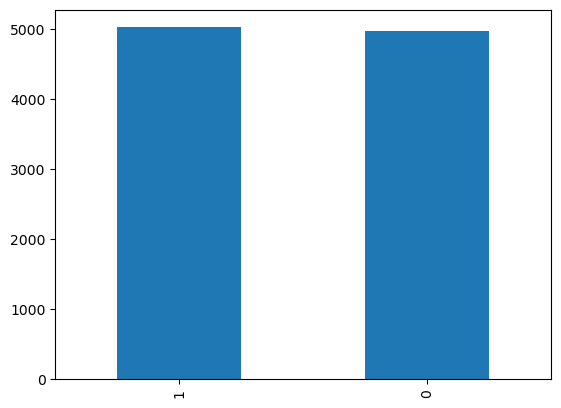

In [9]:
data['Sentiment_Encoded'].value_counts().plot(kind='bar')

Text(0.5, 1.0, 'label distribution')

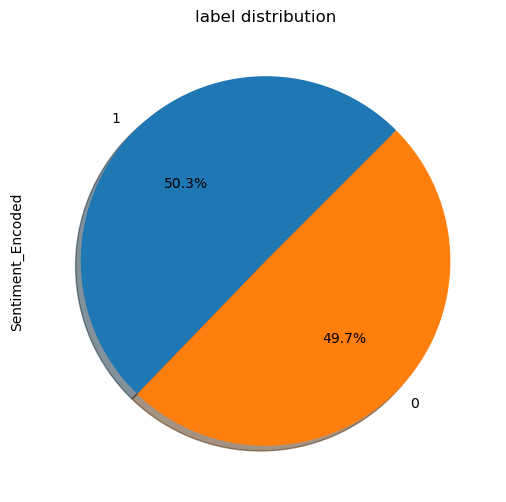

In [10]:
plt.figure(figsize=(10,6))
data['Sentiment_Encoded'].value_counts().plot(kind='pie', autopct='%.1f%%',shadow = True,startangle = 45)
plt.title('label distribution')

# Working With Text

In [11]:
data['review'][999]

"This is like a zoology textbook, given that its depiction of animals is so accurate. However, here are a few details that appear to have been slightly modified during the transition to film:<br /><br />- Handgun bullets never hit giant Komodo dragons. It doesn't matter how many times you shoot at the Komodo, bullets just won't go near it.<br /><br />- The best way to avoid being eaten by a giant Cobra, or a giant Komodo dragon, is just to stand there. The exception to this rule is if you've been told to stay very still, in which case you should run off, until the Komodo is right next to you, and then you should stand there, expecting defeat.<br /><br />- Minutes of choppy slow motion footage behind the credits really makes for enjoyable watching.<br /><br />- $5,000 is a memory enhancement tool, and an ample substitute for losing your boating license/getting arrested.<br /><br />- Members of elite army units don't see giant Komodo dragons coming until they are within one metre of the 

# Cleaning  steps                                       
removing HTML Tags                                        
extracting emojies    # The pattern re.compile('(?::|;|=)(?:-)?(?:\)|\(|D|P)') is a regular expression                                                   used to match and extract emojis from a given text.                                                
removing special chars,puntuation,sumbols                                                 
lower casing    
removing stopwords                                
tokenization

In [12]:
import re
import nltk
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords

In [13]:
stopwords_set = set(stopwords.words('english'))
emoji_pattern = re.compile('(?::|;|=)(?:-)?(?:\)|\(|D|P)')

def preprocessing(text):
    text = re.sub('<[^>]*>', '', text)
    emojis = emoji_pattern.findall(text)
    text = re.sub('[\W+]', ' ', text.lower()) + ' '.join(emojis).replace('-', '')

    prter = PorterStemmer()
    text = [prter.stem(word) for word in text.split() if word not in stopwords_set]

    return " ".join(text)


In [14]:
preprocessing('this is my tags <h1> :) <p>helo world<p> <div> <div> </h2>')

'tag helo world :)'

In [15]:
data['review'] = data['review'].apply(lambda x: preprocessing(x))

In [16]:
data['review']

0       one review mention watch 1 oz episod hook righ...
1       wonder littl product film techniqu unassum old...
2       thought wonder way spend time hot summer weeke...
3       basic famili littl boy jake think zombi closet...
4       petter mattei love time money visual stun film...
                              ...                        
9995    fun entertain movi wwii german spi juli andrew...
9996    give break anyon say good hockey movi know mov...
9997    movi bad movi watch endless seri bad horror mo...
9998    movi probabl made entertain middl school earli...
9999    smash film film make show intens strang relati...
Name: review, Length: 10000, dtype: object

# Visualizing Negative and Positive Words

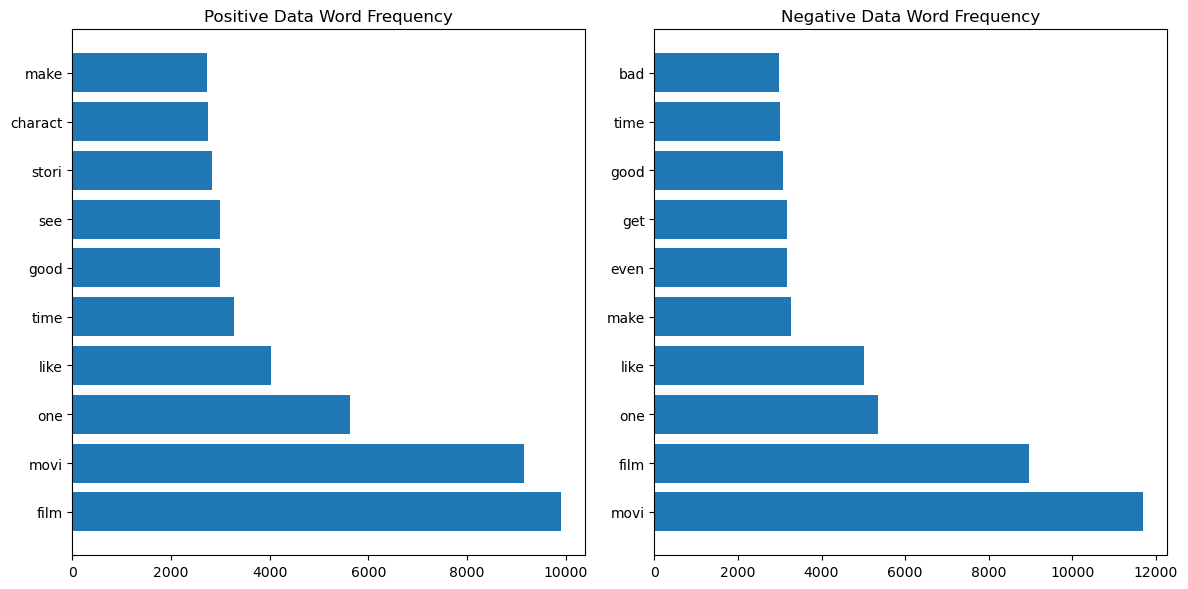

In [17]:
positivedata = data[data['Sentiment_Encoded'] == 1]
positivedata = positivedata['review']
negdata = data[data['Sentiment_Encoded'] == 0]
negdata = negdata['review']

import matplotlib.pyplot as plt
from collections import Counter

# Positive data
positivedata_words = ' '.join(positivedata).split()
positivedata_word_counts = Counter(positivedata_words)
positivedata_common_words = positivedata_word_counts.most_common(10)  # Display top 10 common words

# Negative data
negdata_words = ' '.join(negdata).split()
negdata_word_counts = Counter(negdata_words)
negdata_common_words = negdata_word_counts.most_common(10)  # Display top 10 common words

# Plotting
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Positive data word frequency
axes[0].barh(range(len(positivedata_common_words)), [count for _, count in positivedata_common_words], align='center')
axes[0].set_yticks(range(len(positivedata_common_words)))
axes[0].set_yticklabels([word for word, _ in positivedata_common_words])
axes[0].set_title('Positive Data Word Frequency')

# Negative data word frequency
axes[1].barh(range(len(negdata_common_words)), [count for _, count in negdata_common_words], align='center')
axes[1].set_yticks(range(len(negdata_common_words)))
axes[1].set_yticklabels([word for word, _ in negdata_common_words])
axes[1].set_title('Negative Data Word Frequency')

plt.tight_layout()
plt.show()


# TF-IDF Vertorizer to convert the raw documents into feature matrix 

In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf=TfidfVectorizer(strip_accents=None,lowercase=False,preprocessor=None,use_idf=True,norm='l2',smooth_idf=True)
y=data.Sentiment_Encoded.values
x=tfidf.fit_transform(data.review)

# Training Machine Learning Model for Sentiment Analysis


In [19]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,random_state=1,test_size=0.5,shuffle=False)

In [20]:
from sklearn.linear_model import LogisticRegressionCV
clf=LogisticRegressionCV(cv=6,scoring='accuracy',random_state=0,n_jobs=-1,verbose=3,max_iter=1000).fit(X_train,y_train)
y_pred = clf.predict(X_test)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


RUNNING THE L-BFGS-B CODE

           * * *

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =        36300     M =           10
Machine precision = 2.220D-16
 N =        36300     M =           10

At X0         0 variables are exactly at the bounds

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.88834D+03    |proj g|=  2.65000D+01


ITERATION     1

---------------- CAUCHY entered-------------------
RUNNING THE L-BFGS-B CODE

           * * *


At iterate    0    f=  2.88834D+03    |proj g|=  2.65000D+01


ITERATION     1

---------------- CAUCHY entered-------------------
Machine precision = 2.220D-16
 N =        36300     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.88765D+03    |proj g|=  2.70000D+01


ITERATION     1

---------------- CAUCHY entered-------------------
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =        36300     M =   

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


+00 -2.9286D-06  0.0000D+00 -2.0643D-05
     -2.8700D-05  0.0000D+00 -5.2679D-06  9.8470D-06 -1.0558D-04  3.6137D-05
     -3.9329D-06  5.0149D-06  0.0000D+00 -8.1018D-05  5.3402D-06  2.2805D-06
      0.0000D+00 -5.0205D-05  8.1511D-07 -1.0117D-04 -7.0185D-06  0.0000D+00
      7.9419D-07 -4.4157D-04 -5.7298D-06  0.0000D+00  8.4160D-06  1.8376D-05
      0.0000D+00 -5.5367D-06 -5.6574D-06  3.5068D-06  3.6126D-05  1.4124D-05
      8.8542D-06 -2.8173D-05  0.0000D+00  3.0678D-06  4.8302D-06  0.0000D+00
      0.0000D+00  0.0000D+00  8.1600D-05  0.0000D+00  0.0000D+00  5.6080D-06
      0.0000D+00 -6.0974D-06  5.7490D-06  0.0000D+00  1.5924D-05  1.7787D-05
      3.6589D-06 -2.0093D-05  0.0000D+00  0.0000D+00 -1.3247D-05 -2.9240D-06
      1.5009D-05 -5.5895D-06  0.0000D+00  2.9400D-05  5.3991D-06  4.5482D-06
      0.0000D+00  0.0000D+00  0.0000D+00  0.0000D+00 -3.8723D-06  0.0000D+00
     -6.1778D-05 -4.9105D-06  0.0000D+00  0.0000D+00  0.0000D+00 -4.1765D-06
      1.7414D-05  0.0000D+00  0.0000

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



 LINE SEARCH           1  times; norm of step =   0.39126125121486577     

At iterate   54    f=  4.30902D+01    |proj g|=  6.61635D-03

----------------SUBSM entered-----------------


----------------exit SUBSM --------------------



ITERATION    55
 LINE SEARCH           0  times; norm of step =   0.18948981462299797     

At iterate   17    f=  4.30955D+01    |proj g|=  2.29815D-02

----------------SUBSM entered-----------------



ITERATION    18

----------------exit SUBSM --------------------


----------------SUBSM entered-----------------

 LINE SEARCH           0  times; norm of step =    42.279513324170964     

At iterate    3    f=  1.06244D+01    |proj g|=  3.11757D-01


ITERATION     4

----------------SUBSM entered-----------------


----------------exit SUBSM --------------------


----------------exit SUBSM --------------------

 LINE SEARCH           0  times; norm of step =   0.68156726923198674     

At iterate   55    f=  4.30885D+01    |proj g|=  6.54920D-03
 L

      0.0000D+00  0.0000D+00  0.0000D+00 -3.0226D+00  0.0000D+00  0.0000D+00
      3.1517D-03 -1.0368D-01 -3.9574D+00 -6.2030D-01  0.0000D+00  0.0000D+00
     -7.3538D-01  1.5224D+00  0.0000D+00 -3.6175D+00  0.0000D+00 -1.9292D+00
      4.6745D+00  0.0000D+00 -1.0625D+00 -1.4303D-01  0.0000D+00 -5.7423D-01
      3.0349D-01 -8.0957D-01 -6.5115D-01  0.0000D+00 -1.3649D+00  2.0897D-02
      0.0000D+00  2.0560D+00  1.1114D+00  7.9419D-01  0.0000D+00  1.7913D-01
     -4.7834D-03  2.1496D+00  0.0000D+00 -1.8191D+00  3.9915D-01  0.0000D+00
      0.0000D+00  7.9999D-01 -1.2442D+00 -4.3335D+00 -7.1188D+00  0.0000D+00
      1.7075D+00  0.0000D+00  5.7920D-01  0.0000D+00  0.0000D+00 -3.9143D+00
      0.0000D+00 -2.6558D+00 -1.1101D+00 -3.6417D+00 -9.3629D+00  0.0000D+00
     -1.2813D+00  0.0000D+00  1.1772D+00  9.0546D-02 -9.3952D-01 -1.9318D+00
      1.2779D+00  0.0000D+00  9.0311D-01  3.6630D-01  0.0000D+00  1.5102D-01
      0.0000D+00 -1.1525D-05 -1.3914D+00 -1.1847D-01 -3.9862D+00  0.0000D+00

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    5.4s remaining:    5.4s
 This problem is unconstrained.
 This problem is unconstrained.
IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



# Accuracy

In [21]:
from sklearn import metrics

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8726


# Pickle files

In [22]:
import pickle
pickle.dump(clf,open('clf.pkl','wb'))
pickle.dump(tfidf,open('tfidf.pkl','wb'))

# prediction

In [23]:
def prediction(comment):
    preprocessed_comment = preprocessing(comment)
    comment_list = [preprocessed_comment]  # Wrap the preprocessed comment in a list
    comment_vector = tfidf.transform(comment_list)
    prediction = clf.predict(comment_vector)[0]
    return prediction



prediction = prediction('It’s beautiful!')

In [24]:
if prediction == 1:
    print("positive comment")
else:
    print("negative comment")
    

positive comment


In [25]:
data['review'][9995]

'fun entertain movi wwii german spi juli andrew fall love american pilot rock hudson tri get secret reason attack critic shun public 1970 see beauti shot wonder costum interior excit aerial dogfight also andrew strip teas strictli pg materi sing beauti song whistl dark movi problem andrew hudson get along shoot show love scene lack spark zero sexual chemistri still turn ok perform film littl long even 105 min director cut saw get way dark seriou end still worth catch tri see director cut one run half hour longer'

In [26]:
data['review'][0]

'one review mention watch 1 oz episod hook right exactli happen first thing struck oz brutal unflinch scene violenc set right word go trust show faint heart timid show pull punch regard drug sex violenc hardcor classic use word call oz nicknam given oswald maximum secur state penitentari focus mainli emerald citi experiment section prison cell glass front face inward privaci high agenda em citi home mani aryan muslim gangsta latino christian italian irish scuffl death stare dodgi deal shadi agreement never far away would say main appeal show due fact goe show dare forget pretti pictur paint mainstream audienc forget charm forget romanc oz mess around first episod ever saw struck nasti surreal say readi watch develop tast oz got accustom high level graphic violenc violenc injustic crook guard sold nickel inmat kill order get away well manner middl class inmat turn prison bitch due lack street skill prison experi watch oz may becom comfort uncomfort view that get touch darker side'